In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Object to be detected

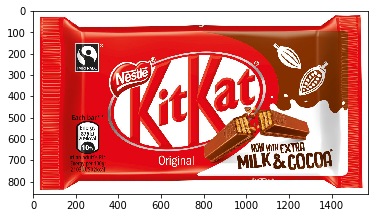

In [12]:
plt.imshow( plt.imread( 'KitKat.jpg' ) )

# Detector Window

In [4]:
def ORB_detector(new_image, image_template):
    # Function that compares input image to template
    # It then returns the number of ORB matches between them
    
    image1 = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    # Create ORB detector with 1000 keypoints with a scaling pyramid factor of 1.2
    orb = cv2.ORB_create(1000, 1.2)

    # Detect keypoints of original image
    (kp1, des1) = orb.detectAndCompute(image1, None)

    # Detect keypoints of rotated image
    (kp2, des2) = orb.detectAndCompute(image_template, None)

    # Create matcher 
    # Note we're no longer using Flannbased matching
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Do matching
    matches = bf.match(des1,des2)

    # Sort the matches based on distance.  Least distance
    # is better
    matches = sorted(matches, key=lambda val: val.distance)
    
    return len(matches)

image_template = cv2.imread('KitKat.jpg', 0) 

cap = cv2.VideoCapture(0)

while True:
    
    ret , frame = cap.read()
    
    # Get height and width of webcam frame
    height, width = frame.shape[:2]

    # Define ROI Box Dimensions
    top_left_x = width // 3
    top_left_y = (height // 2) + (height // 4)
    bottom_right_x = (width // 3) * 2
    bottom_right_y = (height // 2) - (height // 4)
    
#     frame = cv2.cvtColor( frame , cv2.COLOR_BGR2RGB ) 
    
    # Draw rectangular window for our region of interest   
    cv2.rectangle( img = frame, pt1 = (top_left_x,top_left_y), pt2 = (bottom_right_x,bottom_right_y), color = 255, thickness = 3)
    
    # Crop window of observation we defined above
    cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

    # Flip frame orientation horizontally
    frame = cv2.flip(frame,1)
    
    # Get number of ORB matches 
    matches = ORB_detector(cropped, image_template)
    
    # Display status string showing the current no. of matches 
    output_string = "Matches = " + str(matches)
    cv2.putText(frame, output_string, (50,450), cv2.FONT_HERSHEY_COMPLEX, 2, (250,0,150), 2)
    
    # Our threshold to indicate object deteciton
    # For new images or lightening conditions you may need to experiment a bit 
    # Note: The ORB detector to get the top 1000 matches, 350 is essentially a min 35% match
    threshold = 200
    
    # If matches exceed our threshold then object has been detected
    if matches > threshold:
        cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (0,255,0), 3)
        cv2.putText(frame,'Object Found',(50,50), cv2.FONT_HERSHEY_COMPLEX, 2 ,(0,255,0), 2)
    
    cv2.imshow('Object Detector using ORB', frame)

    
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
cap.release()
cv2.destroyAllWindows()